In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

***READ DATA***

In [3]:
data=pd.read_csv("vehicle_maintenance_data.csv")
data

,Vehicle_Model,Maintenance_History,Reported_Issues,Vehicle_Age,Fuel_Type,Transmission_Type,Engine_Size,Odometer_Reading,Last_Service_Date,Warranty_Expiry_Date,Owner_Type,Insurance_Premium,Service_History,Accident_History,Fuel_Efficiency,Tire_Condition,Brake_Condition,Battery_Status,Need_Maintenance
0,Truck,Good,0,4,Electric,Automatic,2000,28524,23-11-2023,24-06-2025,Second,20782,6,3,13.622204,New,New,Weak,1
1,Van,Average,1,7,Electric,Automatic,2500,133630,21-09-2023,04-06-2025,Second,23489,7,0,13.625307,New,New,Weak,1
2,Bus,Poor,0,2,Electric,Automatic,1500,34022,27-06-2023,27-04-2025,First,17979,7,0,14.306302,New,Good,Weak,1
3,Bus,Average,4,5,Petrol,Automatic,2500,81636,24-08-2023,05-11-2025,Second,6220,7,3,18.709467,New,Worn Out,New,1
4,Bus,Poor,5,1,Petrol,Manual,2000,97162,25-05-2023,14-09-2025,Third,16446,6,2,16.977483,Good,Good,Weak,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,Car,Good,3,6,Diesel,Automatic,2500,97404,24-11-2023,15-09-2025,Third,5217,4,1,10.357298,New,Good,Weak,1
49996,Truck,Good,4,4,Diesel,Manual,800,13421,14-07-2023,21-01-2025,Second,15856,4,1,14.924022,Worn Out,New,Good,1
49997,Van,Poor,0,4,Electric,Automatic,1500,124851,09-09-2023,09-11-2024,First,6019,10,0,19.859243,Worn Out,Worn Out,Weak,1
49998,Car,Good,1,7,Electric,Manual,2500,103182,26-08-2023,22-05-2025,Third,5030,4,3,10.720555,New,Good,Weak,1


***DATA UNDERSTANDING***

In [5]:
data.head()

,Vehicle_Model,Maintenance_History,Reported_Issues,Vehicle_Age,Fuel_Type,Transmission_Type,Engine_Size,Odometer_Reading,Last_Service_Date,Warranty_Expiry_Date,Owner_Type,Insurance_Premium,Service_History,Accident_History,Fuel_Efficiency,Tire_Condition,Brake_Condition,Battery_Status,Need_Maintenance
0,Truck,Good,0,4,Electric,Automatic,2000,28524,23-11-2023,24-06-2025,Second,20782,6,3,13.622204,New,New,Weak,1
1,Van,Average,1,7,Electric,Automatic,2500,133630,21-09-2023,04-06-2025,Second,23489,7,0,13.625307,New,New,Weak,1
2,Bus,Poor,0,2,Electric,Automatic,1500,34022,27-06-2023,27-04-2025,First,17979,7,0,14.306302,New,Good,Weak,1
3,Bus,Average,4,5,Petrol,Automatic,2500,81636,24-08-2023,05-11-2025,Second,6220,7,3,18.709467,New,Worn Out,New,1
4,Bus,Poor,5,1,Petrol,Manual,2000,97162,25-05-2023,14-09-2025,Third,16446,6,2,16.977483,Good,Good,Weak,1


In [6]:
data.tail()

,Vehicle_Model,Maintenance_History,Reported_Issues,Vehicle_Age,Fuel_Type,Transmission_Type,Engine_Size,Odometer_Reading,Last_Service_Date,Warranty_Expiry_Date,Owner_Type,Insurance_Premium,Service_History,Accident_History,Fuel_Efficiency,Tire_Condition,Brake_Condition,Battery_Status,Need_Maintenance
49995,Car,Good,3,6,Diesel,Automatic,2500,97404,24-11-2023,15-09-2025,Third,5217,4,1,10.357298,New,Good,Weak,1
49996,Truck,Good,4,4,Diesel,Manual,800,13421,14-07-2023,21-01-2025,Second,15856,4,1,14.924022,Worn Out,New,Good,1
49997,Van,Poor,0,4,Electric,Automatic,1500,124851,09-09-2023,09-11-2024,First,6019,10,0,19.859243,Worn Out,Worn Out,Weak,1
49998,Car,Good,1,7,Electric,Manual,2500,103182,26-08-2023,22-05-2025,Third,5030,4,3,10.720555,New,Good,Weak,1
49999,Car,Poor,0,10,Petrol,Manual,2000,65721,25-07-2023,06-06-2024,Third,9171,6,3,16.328945,Good,New,Good,0


In [7]:
data.size

950000

In [8]:
data.shape

(50000, 19)

In [9]:
data.columns

Index(['Vehicle_Model', 'Maintenance_History', 'Reported_Issues',
       'Vehicle_Age', 'Fuel_Type', 'Transmission_Type', 'Engine_Size',
       'Odometer_Reading', 'Last_Service_Date', 'Warranty_Expiry_Date',
       'Owner_Type', 'Insurance_Premium', 'Service_History',
       'Accident_History', 'Fuel_Efficiency', 'Tire_Condition',
       'Brake_Condition', 'Battery_Status', 'Need_Maintenance'],
      dtype='object')

In [10]:
data.dtypes

Vehicle_Model            object
Maintenance_History      object
Reported_Issues           int64
Vehicle_Age               int64
Fuel_Type                object
Transmission_Type        object
Engine_Size               int64
Odometer_Reading          int64
Last_Service_Date        object
Warranty_Expiry_Date     object
Owner_Type               object
Insurance_Premium         int64
Service_History           int64
Accident_History          int64
Fuel_Efficiency         float64
Tire_Condition           object
Brake_Condition          object
Battery_Status           object
Need_Maintenance          int64
dtype: object

In [11]:
data.describe()

,Reported_Issues,Vehicle_Age,Engine_Size,Odometer_Reading,Insurance_Premium,Service_History,Accident_History,Fuel_Efficiency,Need_Maintenance
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,2.497420,5.492260,1556.292000,75551.187060,17465.340700,5.515560,1.50156,14.990323,0.809960
std,1.708781,2.875682,627.677218,43088.105658,7223.393401,2.874899,1.11951,2.885583,0.392336
min,0.000000,1.000000,800.000000,1001.000000,5000.000000,1.000000,0.00000,10.000098,0.000000
25%,1.000000,3.000000,1000.000000,38009.000000,11189.750000,3.000000,0.00000,12.489037,1.000000
50%,2.000000,5.000000,1500.000000,75598.500000,17477.500000,6.000000,2.00000,14.986352,1.000000
75%,4.000000,8.000000,2000.000000,112999.500000,23692.000000,8.000000,3.00000,17.474676,1.000000
max,5.000000,10.000000,2500.000000,149999.000000,30000.000000,10.000000,3.00000,19.999968,1.000000


In [12]:
data.isnull().sum()

Vehicle_Model           0
Maintenance_History     0
Reported_Issues         0
Vehicle_Age             0
Fuel_Type               0
Transmission_Type       0
Engine_Size             0
Odometer_Reading        0
Last_Service_Date       0
Warranty_Expiry_Date    0
Owner_Type              0
Insurance_Premium       0
Service_History         0
Accident_History        0
Fuel_Efficiency         0
Tire_Condition          0
Brake_Condition         0
Battery_Status          0
Need_Maintenance        0
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Vehicle_Model         50000 non-null  object 
 1   Maintenance_History   50000 non-null  object 
 2   Reported_Issues       50000 non-null  int64  
 3   Vehicle_Age           50000 non-null  int64  
 4   Fuel_Type             50000 non-null  object 
 5   Transmission_Type     50000 non-null  object 
 6   Engine_Size           50000 non-null  int64  
 7   Odometer_Reading      50000 non-null  int64  
 8   Last_Service_Date     50000 non-null  object 
 9   Warranty_Expiry_Date  50000 non-null  object 
 10  Owner_Type            50000 non-null  object 
 11  Insurance_Premium     50000 non-null  int64  
 12  Service_History       50000 non-null  int64  
 13  Accident_History      50000 non-null  int64  
 14  Fuel_Efficiency       50000 non-null  float64
 15  Tire_Condition     

In [14]:
data.duplicated().sum()

0

In [15]:
data=data.drop(columns=[ 'Vehicle_Model','Last_Service_Date','Warranty_Expiry_Date'])

In [16]:
data

,Maintenance_History,Reported_Issues,Vehicle_Age,Fuel_Type,Transmission_Type,Engine_Size,Odometer_Reading,Owner_Type,Insurance_Premium,Service_History,Accident_History,Fuel_Efficiency,Tire_Condition,Brake_Condition,Battery_Status,Need_Maintenance
0,Good,0,4,Electric,Automatic,2000,28524,Second,20782,6,3,13.622204,New,New,Weak,1
1,Average,1,7,Electric,Automatic,2500,133630,Second,23489,7,0,13.625307,New,New,Weak,1
2,Poor,0,2,Electric,Automatic,1500,34022,First,17979,7,0,14.306302,New,Good,Weak,1
3,Average,4,5,Petrol,Automatic,2500,81636,Second,6220,7,3,18.709467,New,Worn Out,New,1
4,Poor,5,1,Petrol,Manual,2000,97162,Third,16446,6,2,16.977483,Good,Good,Weak,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,Good,3,6,Diesel,Automatic,2500,97404,Third,5217,4,1,10.357298,New,Good,Weak,1
49996,Good,4,4,Diesel,Manual,800,13421,Second,15856,4,1,14.924022,Worn Out,New,Good,1
49997,Poor,0,4,Electric,Automatic,1500,124851,First,6019,10,0,19.859243,Worn Out,Worn Out,Weak,1
49998,Good,1,7,Electric,Manual,2500,103182,Third,5030,4,3,10.720555,New,Good,Weak,1


***EDA (Exploratory Data Analysis)***

<Axes: >

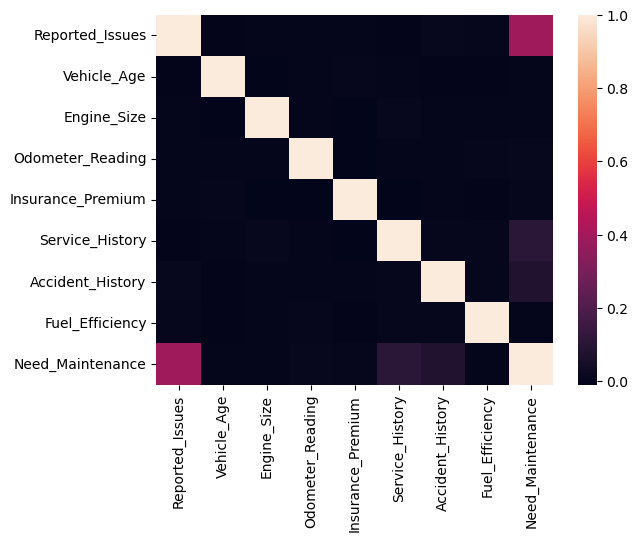

In [18]:
cor=data.select_dtypes(include=["float64","int64"])
sns.heatmap(cor.corr())

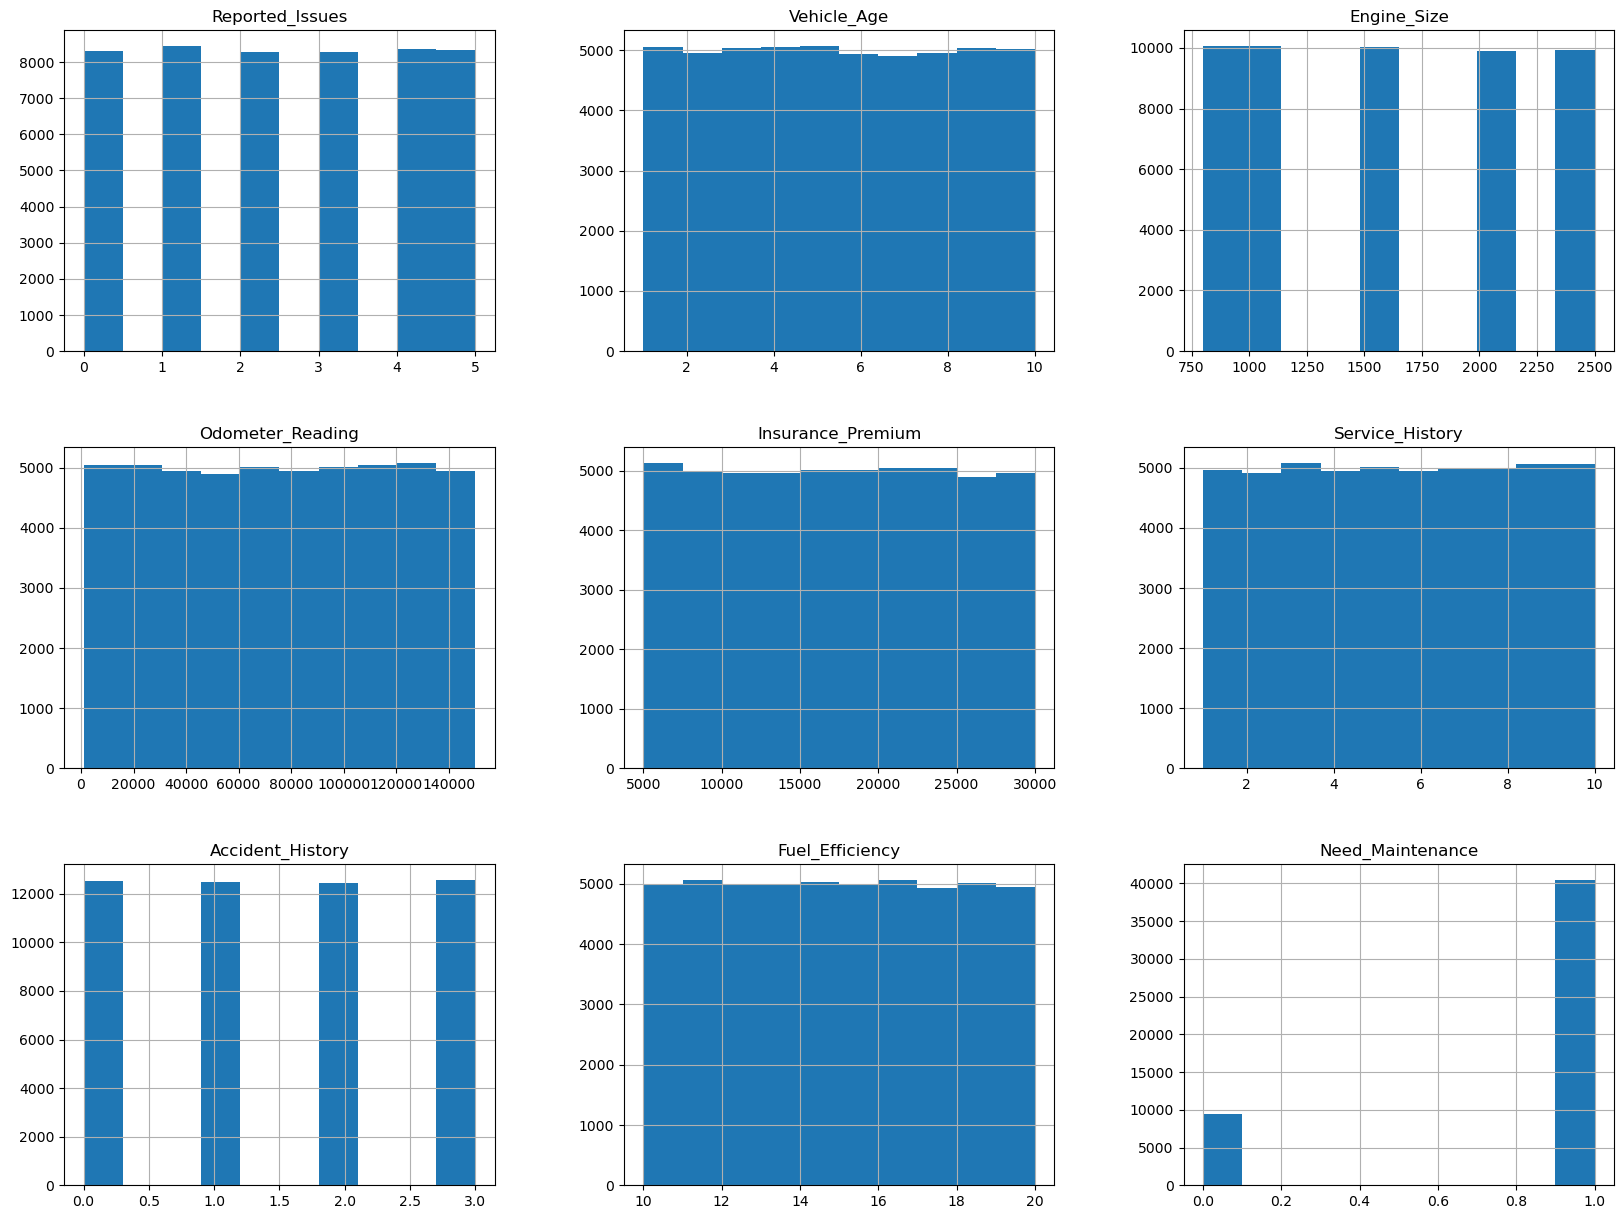

In [19]:
data.hist(figsize=(20,15));
plt.savefig("plt.png")

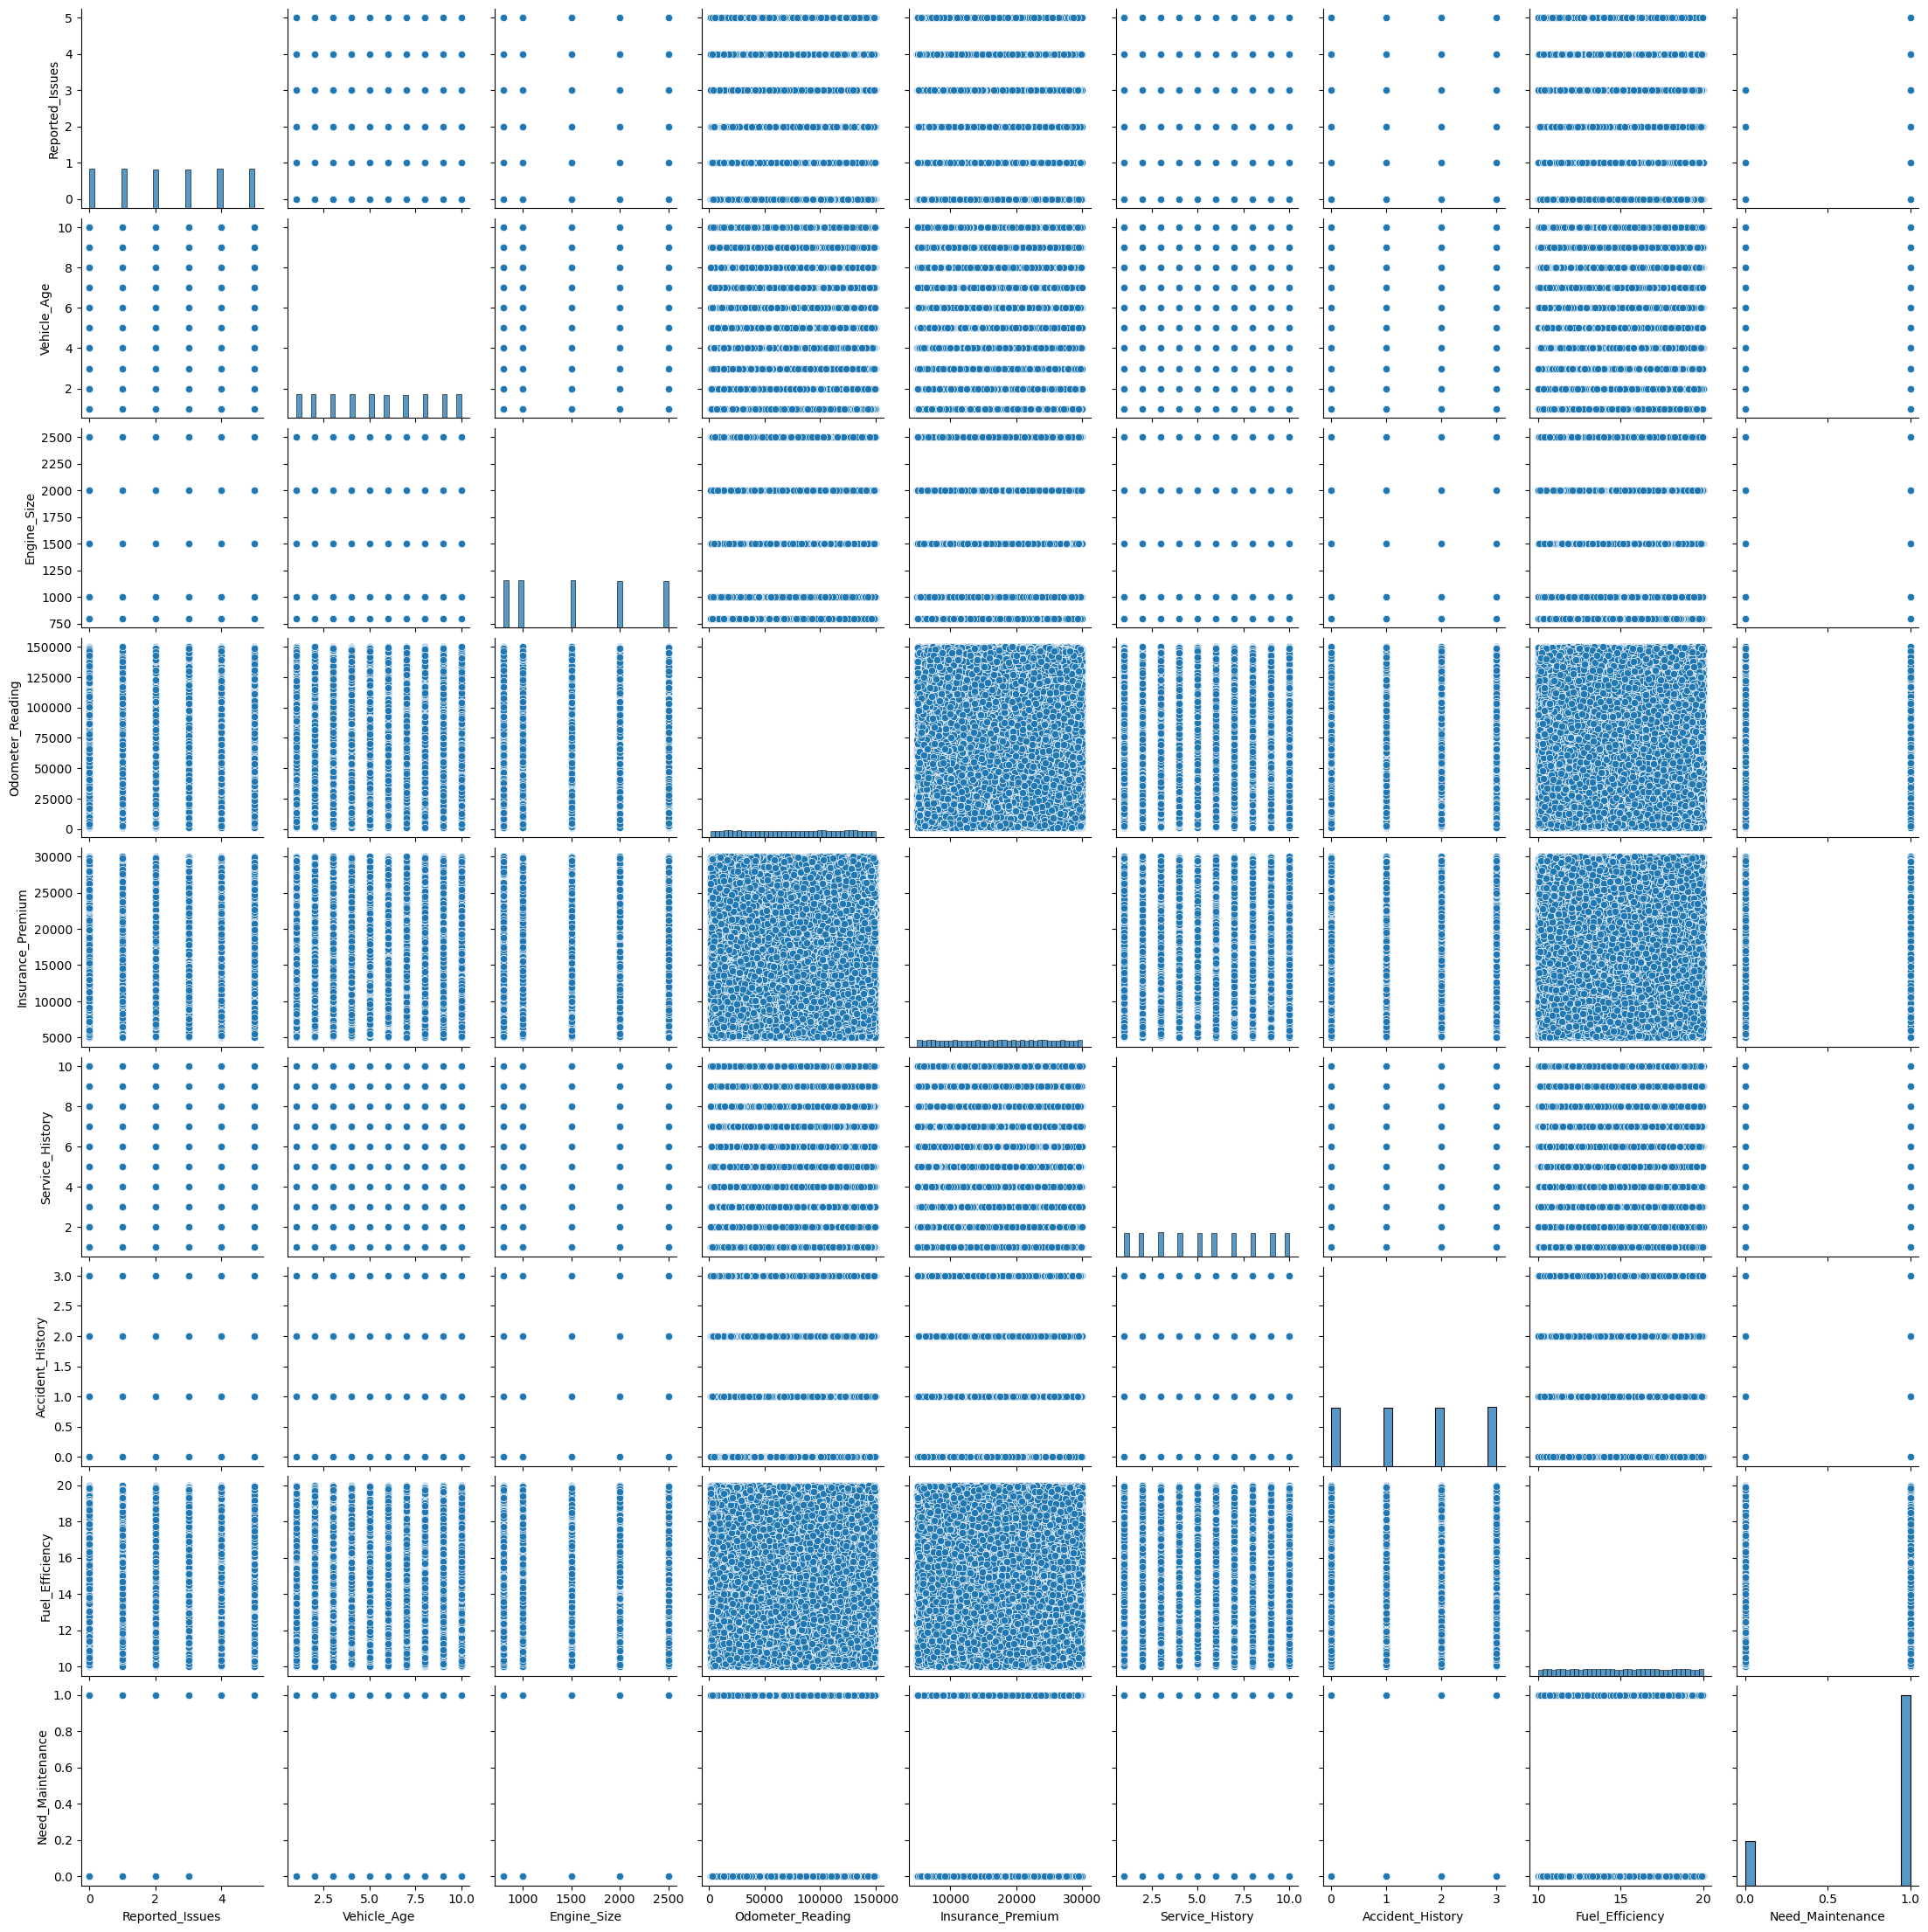

In [20]:
sns.pairplot(data)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Reported_Issues'),
  Text(1, 0, 'Vehicle_Age'),
  Text(2, 0, 'Engine_Size'),
  Text(3, 0, 'Odometer_Reading'),
  Text(4, 0, 'Insurance_Premium'),
  Text(5, 0, 'Service_History'),
  Text(6, 0, 'Accident_History'),
  Text(7, 0, 'Fuel_Efficiency'),
  Text(8, 0, 'Need_Maintenance')])

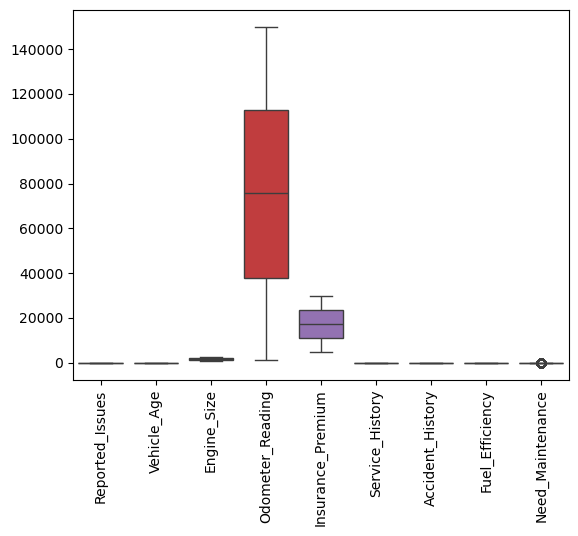

In [21]:
sns.boxplot(data)
plt.xticks(rotation=90)

***REPLACING OUTLIER***

***ENCODING***

In [24]:
encoder1=LabelEncoder()
data["Maintenance_History"]=encoder1.fit_transform(data["Maintenance_History"])
encoder2=LabelEncoder()
data["Fuel_Type"]=encoder2.fit_transform(data["Fuel_Type"])
encoder3=LabelEncoder()
data["Transmission_Type"]=encoder3.fit_transform(data["Transmission_Type"])
encoder4=LabelEncoder()
data["Owner_Type"]=encoder4.fit_transform(data["Owner_Type"])
encoder5=LabelEncoder()
data["Tire_Condition"]=encoder5.fit_transform(data["Tire_Condition"])
encoder6=LabelEncoder()
data["Brake_Condition"]=encoder6.fit_transform(data["Brake_Condition"])
encoder7=LabelEncoder()
data["Battery_Status"]=encoder7.fit_transform(data["Battery_Status"])
data

,Maintenance_History,Reported_Issues,Vehicle_Age,Fuel_Type,Transmission_Type,Engine_Size,Odometer_Reading,Owner_Type,Insurance_Premium,Service_History,Accident_History,Fuel_Efficiency,Tire_Condition,Brake_Condition,Battery_Status,Need_Maintenance
0,1,0,4,1,0,2000,28524,1,20782,6,3,13.622204,1,1,2,1
1,0,1,7,1,0,2500,133630,1,23489,7,0,13.625307,1,1,2,1
2,2,0,2,1,0,1500,34022,0,17979,7,0,14.306302,1,0,2,1
3,0,4,5,2,0,2500,81636,1,6220,7,3,18.709467,1,2,1,1
4,2,5,1,2,1,2000,97162,2,16446,6,2,16.977483,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,3,6,0,0,2500,97404,2,5217,4,1,10.357298,1,0,2,1
49996,1,4,4,0,1,800,13421,1,15856,4,1,14.924022,2,1,0,1
49997,2,0,4,1,0,1500,124851,0,6019,10,0,19.859243,2,2,2,1
49998,1,1,7,1,1,2500,103182,2,5030,4,3,10.720555,1,0,2,1


***X,Y Seperation***

In [26]:
x=data.drop("Need_Maintenance", axis=1)
y=data["Need_Maintenance"]

In [27]:
x

,Maintenance_History,Reported_Issues,Vehicle_Age,Fuel_Type,Transmission_Type,Engine_Size,Odometer_Reading,Owner_Type,Insurance_Premium,Service_History,Accident_History,Fuel_Efficiency,Tire_Condition,Brake_Condition,Battery_Status
0,1,0,4,1,0,2000,28524,1,20782,6,3,13.622204,1,1,2
1,0,1,7,1,0,2500,133630,1,23489,7,0,13.625307,1,1,2
2,2,0,2,1,0,1500,34022,0,17979,7,0,14.306302,1,0,2
3,0,4,5,2,0,2500,81636,1,6220,7,3,18.709467,1,2,1
4,2,5,1,2,1,2000,97162,2,16446,6,2,16.977483,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,3,6,0,0,2500,97404,2,5217,4,1,10.357298,1,0,2
49996,1,4,4,0,1,800,13421,1,15856,4,1,14.924022,2,1,0
49997,2,0,4,1,0,1500,124851,0,6019,10,0,19.859243,2,2,2
49998,1,1,7,1,1,2500,103182,2,5030,4,3,10.720555,1,0,2


In [28]:
y

0        1
1        1
2        1
3        1
4        1
        ..
49995    1
49996    1
49997    1
49998    1
49999    0
Name: Need_Maintenance, Length: 50000, dtype: int64

***Scaling***

In [30]:
scaler=StandardScaler()
x1=scaler.fit_transform(x)
x1

array([[ 3.92188152e-03, -1.46153621e+00, -5.18929095e-01, ...,
        -1.69417881e-03, -9.30825122e-04,  1.22677463e+00],
       [-1.22166609e+00, -8.76317779e-01,  5.24312220e-01, ...,
        -1.69417881e-03, -9.30825122e-04,  1.22677463e+00],
       [ 1.22950986e+00, -1.46153621e+00, -1.21442330e+00, ...,
        -1.69417881e-03, -1.22570072e+00,  1.22677463e+00],
       ...,
       [ 1.22950986e+00, -1.46153621e+00, -5.18929095e-01, ...,
         1.22597163e+00,  1.22383907e+00,  1.22677463e+00],
       [ 3.92188152e-03, -8.76317779e-01,  5.24312220e-01, ...,
        -1.69417881e-03, -1.22570072e+00,  1.22677463e+00],
       [ 1.22950986e+00, -1.46153621e+00,  1.56755353e+00, ...,
        -1.22935998e+00, -9.30825122e-04, -1.22486235e+00]])

***Train-test-split***

In [32]:
x1_train,x1_test,y_train,y_test=train_test_split(x1,y,test_size=.3,random_state=42)

***LogisticRegression***

In [34]:
model=LogisticRegression()
model.fit(x1_train,y_train)

LogisticRegression()

In [35]:
train_pred=model.predict(x1_train)
train_pred

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [36]:
test_pred=model.predict(x1_test)
test_pred

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [37]:
score=accuracy_score(train_pred,y_train)
score

0.8843428571428571

In [38]:
score1=accuracy_score(test_pred,y_test)
score1

0.8862

In [39]:
cm=confusion_matrix(train_pred,y_train)
cm

array([[ 4001,  1402],
       [ 2646, 26951]], dtype=int64)

In [40]:
cr=classification_report(train_pred,y_train)

***DecisionTree Classifier***

In [42]:
model1=DecisionTreeClassifier()
model1.fit(x1_train,y_train)

DecisionTreeClassifier()

In [43]:
train_pred1=model1.predict(x1_train)
train_pred1

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [44]:
test_pred1=model1.predict(x1_test)
test_pred1

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [45]:
score2=accuracy_score(train_pred1,y_train)
score2

1.0

In [46]:
score3=accuracy_score(test_pred1,y_test)
score3

1.0

In [47]:
cm2=confusion_matrix(train_pred1,y_train)
cm

array([[ 4001,  1402],
       [ 2646, 26951]], dtype=int64)

In [48]:
cr2=classification_report(train_pred1,y_train)
print(cr)

              precision    recall  f1-score   support

           0       0.60      0.74      0.66      5403
           1       0.95      0.91      0.93     29597

    accuracy                           0.88     35000
   macro avg       0.78      0.83      0.80     35000
weighted avg       0.90      0.88      0.89     35000



***RandomForest Classifier***

In [50]:
model2=RandomForestClassifier()
model2.fit(x1_train,y_train)

RandomForestClassifier()

In [51]:
train_pred2=model2.predict(x1_train)
train_pred2

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [52]:
test_pred2=model2.predict(x1_test)
test_pred2

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [53]:
score4=accuracy_score(train_pred2,y_train)
score4

1.0

In [54]:
score5=accuracy_score(test_pred2,y_test)
score5

1.0

In [55]:
cm3=confusion_matrix(train_pred2,y_train)
cm

array([[ 4001,  1402],
       [ 2646, 26951]], dtype=int64)

In [56]:
cr3=classification_report(train_pred2,y_train)
print(cr)

              precision    recall  f1-score   support

           0       0.60      0.74      0.66      5403
           1       0.95      0.91      0.93     29597

    accuracy                           0.88     35000
   macro avg       0.78      0.83      0.80     35000
weighted avg       0.90      0.88      0.89     35000



***AdaBoostClassifier***

In [58]:
model3=AdaBoostClassifier()
model3.fit(x1_train,y_train)

AdaBoostClassifier()

In [59]:
train_pred_3=model3.predict(x1_train)
train_pred_3

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [60]:
test_pred_3=model3.predict(x1_test)
test_pred_3

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [61]:
score6 = accuracy_score(train_pred_3, y_train)
score6

0.9584285714285714

In [62]:
score7=accuracy_score(test_pred_3,y_test)
score7

0.9574666666666667

In [63]:
cm4=confusion_matrix(train_pred_3,y_train)
cm4

array([[ 5986,   794],
       [  661, 27559]], dtype=int64)

In [64]:
cr4=classification_report(train_pred_3,y_train)
print(cr4)

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      6780
           1       0.97      0.98      0.97     28220

    accuracy                           0.96     35000
   macro avg       0.94      0.93      0.93     35000
weighted avg       0.96      0.96      0.96     35000



***GradientBoosting classifier***

In [66]:
model4=GradientBoostingClassifier()
model4.fit(x1_train,y_train)

GradientBoostingClassifier()

In [67]:
train_pred4=model4.predict(x1_train)
train_pred4

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [68]:
test_pred4=model4.predict(x1_test)
test_pred4

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [69]:
score8=accuracy_score(train_pred4,y_train)
score8

1.0

In [70]:
score9=accuracy_score(test_pred4,y_test)
score9

1.0

In [71]:
cm5=confusion_matrix(train_pred4,y_train)
cm5

array([[ 6647,     0],
       [    0, 28353]], dtype=int64)

In [72]:
cr5=classification_report(train_pred4,y_train)
print(cr5)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6647
           1       1.00      1.00      1.00     28353

    accuracy                           1.00     35000
   macro avg       1.00      1.00      1.00     35000
weighted avg       1.00      1.00      1.00     35000



***XGB Classifier***

In [74]:
model5=XGBClassifier()
model5.fit(x1_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [75]:
train_pred5=model5.predict(x1_train)
train_pred5

array([1, 1, 0, ..., 1, 1, 1])

In [76]:
test_pred5=model5.predict(x1_test)
test_pred5

array([1, 1, 0, ..., 1, 1, 1])

In [77]:
score10=accuracy_score(train_pred5,y_train)
score10

1.0

In [78]:
score11=accuracy_score(test_pred5,y_test)
score11

1.0

In [79]:
cm6=confusion_matrix(train_pred5,y_train)
cm6

array([[ 6647,     0],
       [    0, 28353]], dtype=int64)

In [80]:
cr6=classification_report(train_pred5,y_train)
print(cr6)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6647
           1       1.00      1.00      1.00     28353

    accuracy                           1.00     35000
   macro avg       1.00      1.00      1.00     35000
weighted avg       1.00      1.00      1.00     35000



***KNN***

In [82]:
model6=KNeighborsClassifier(n_neighbors=10)
model6.fit(x1_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [83]:
train_pred6=model6.predict(x1_train)
train_pred6

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [84]:
test_pred6=model6.predict(x1_test)
test_pred6

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [85]:
score12=accuracy_score(train_pred6,y_train)
score12

0.9604857142857143

In [86]:
score13=accuracy_score(test_pred6,y_test)
score13

0.9418

In [87]:
cm7=confusion_matrix(train_pred6,y_train)
cm7

array([[ 5797,   533],
       [  850, 27820]], dtype=int64)

In [88]:
cr7=classification_report(train_pred,y_train)
print(cr7)

              precision    recall  f1-score   support

           0       0.60      0.74      0.66      5403
           1       0.95      0.91      0.93     29597

    accuracy                           0.88     35000
   macro avg       0.78      0.83      0.80     35000
weighted avg       0.90      0.88      0.89     35000



In [89]:
# rbf=SVC()
# rbf.fit(x_new_train,y_train)
# rbf.score(x_new_test,y_test)

In [90]:
# linear=SVC(kernel="linear")
# linear.fit(x_new_train,y_train)
# linear.score(x_new_test,y_test)

In [91]:
# poly=SVC(kernel="poly",degree=3,gamma=15,C=200)
# poly.fit(x_new_train,y_train)
# poly.score(x_new_test,y_test)

In [92]:
# sigmoid=SVC(kernel="sigmoid",gamma=1,C=5)
# sigmoid.fit(x_new_train,y_train)
# sigmoid.score(x_new_test,y_test)

***GaussianNB***

In [94]:
model7=GaussianNB()
model7.fit(x1_train,y_train)

GaussianNB()

In [95]:
train_pred7=model7.predict(x1_train)
train_pred7

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [96]:
test_pred7=model7.predict(x1_test)
test_pred7

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [97]:
score14=accuracy_score(train_pred7,y_train)
score14

0.9145714285714286

In [98]:
score15=accuracy_score(test_pred7,y_test)
score15

0.9159333333333334

In [99]:
cm8=confusion_matrix(train_pred7,y_train)
cm8

array([[ 4270,   613],
       [ 2377, 27740]], dtype=int64)

In [100]:
cr8=classification_report(train_pred7,y_train)
print(cr8)

              precision    recall  f1-score   support

           0       0.64      0.87      0.74      4883
           1       0.98      0.92      0.95     30117

    accuracy                           0.91     35000
   macro avg       0.81      0.90      0.84     35000
weighted avg       0.93      0.91      0.92     35000



In [101]:
model_names=["Logistic Regession","Decision tree","Random forest","adaboost","Gradient boosting","XGB","knn","GaussianNB"]
train_scores=[score,score2,score4,score6,score8,score10,score12,score14]
test_scores=[score1,score3,score5,score7,score9,score11,score13,score15]

In [102]:
pd.DataFrame({"model":model_names,"test_accuracy":train_scores,"train_accuracy":test_scores})

,model,test_accuracy,train_accuracy
0,Logistic Regession,0.884343,0.886200
1,Decision tree,1.000000,1.000000
2,Random forest,1.000000,1.000000
3,adaboost,0.958429,0.957467
4,Gradient boosting,1.000000,1.000000
5,XGB,1.000000,1.000000
6,knn,0.960486,0.941800
7,GaussianNB,0.914571,0.915933


***After balancing data***

In [104]:
over=SMOTE(random_state=2)
x_os,y_os=over.fit_resample(x1,y)

In [105]:
y_os.value_counts()

Need_Maintenance
1    40498
0    40498
Name: count, dtype: int64

In [106]:
x_os_train,x_os_test,y_os_train,y_os_test=train_test_split(x_os,y_os,test_size=.3,random_state=42)

In [107]:
mdl1=LogisticRegression()
mdl1.fit(x_os_train,y_os_train)

LogisticRegression()

In [108]:
tr_pred1=mdl1.predict(x_os_train)
tr_pred1

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [109]:
ts_pred1=mdl1.predict(x_os_test)
ts_pred1

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [110]:
sc1=accuracy_score(tr_pred1,y_os_train)
sc1

0.8460765119847611

In [111]:
sc2=accuracy_score(ts_pred1,y_os_test)
sc2

0.8433680398370303

In [112]:
c_matrix=confusion_matrix(tr_pred1,y_os_train)
c_matrix

array([[24422,  4748],
       [ 3979, 23548]], dtype=int64)

In [113]:
c_report=classification_report(tr_pred1,y_os_train)
print(c_report)

              precision    recall  f1-score   support

           0       0.86      0.84      0.85     29170
           1       0.83      0.86      0.84     27527

    accuracy                           0.85     56697
   macro avg       0.85      0.85      0.85     56697
weighted avg       0.85      0.85      0.85     56697



In [114]:
mdl2=DecisionTreeClassifier()
mdl2.fit(x_os_train,y_os_train)

DecisionTreeClassifier()

In [115]:
tr_pred2=mdl2.predict(x_os_train)
tr_pred2

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [116]:
ts_pred2=mdl2.predict(x_os_test)
ts_pred2

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [117]:
sc3=accuracy_score(tr_pred2,y_os_train)
sc3

1.0

In [118]:
sc4=accuracy_score(ts_pred2,y_os_test)
sc4

1.0

In [119]:
c_matrix1=confusion_matrix(tr_pred2,y_os_train)
c_matrix1

array([[28401,     0],
       [    0, 28296]], dtype=int64)

In [120]:
c_report1=classification_report(tr_pred2,y_os_train)
print(c_report1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28401
           1       1.00      1.00      1.00     28296

    accuracy                           1.00     56697
   macro avg       1.00      1.00      1.00     56697
weighted avg       1.00      1.00      1.00     56697



In [121]:
mdl3=RandomForestClassifier()
mdl3.fit(x_os_train,y_os_train)

RandomForestClassifier()

In [122]:
tr_pred3=mdl3.predict(x_os_train)
tr_pred3

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [123]:
ts_pred3=mdl3.predict(x_os_test)
ts_pred3

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [124]:
sc5=accuracy_score(tr_pred3,y_os_train)
sc5

1.0

In [125]:
sc6=accuracy_score(ts_pred3,y_os_test)
sc6

1.0

In [126]:
c_matrix2=confusion_matrix(tr_pred3,y_os_train)
c_matrix2

array([[28401,     0],
       [    0, 28296]], dtype=int64)

In [127]:
c_report2=classification_report(tr_pred3,y_os_train)
print(c_report2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28401
           1       1.00      1.00      1.00     28296

    accuracy                           1.00     56697
   macro avg       1.00      1.00      1.00     56697
weighted avg       1.00      1.00      1.00     56697



In [128]:
mdl4=AdaBoostClassifier()
mdl4.fit(x_os_train,y_os_train)

AdaBoostClassifier()

In [129]:
tr_pred4=mdl4.predict(x_os_train)
tr_pred4

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [130]:
ts_pred4=mdl4.predict(x_os_test)
ts_pred4

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [131]:
sc7=accuracy_score(tr_pred4,y_os_train)
sc7

0.9778295147891423

In [132]:
sc8=accuracy_score(ts_pred4,y_os_test)
sc8

0.9785999423844602

In [133]:
c_matrix3=confusion_matrix(tr_pred4,y_os_train)
c_matrix3

array([[28059,   915],
       [  342, 27381]], dtype=int64)

In [134]:
c_report3=classification_report(tr_pred4,y_os_train)
print(c_report3)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     28974
           1       0.97      0.99      0.98     27723

    accuracy                           0.98     56697
   macro avg       0.98      0.98      0.98     56697
weighted avg       0.98      0.98      0.98     56697



In [135]:
mld5=GradientBoostingClassifier()
mld5.fit(x_os_train,y_os_train)

GradientBoostingClassifier()

In [136]:
tr_pred5=mld5.predict(x_os_train)
tr_pred5

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [137]:
ts_pred5=mld5.predict(x_os_test)
ts_pred5

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [138]:
sc9=accuracy_score(tr_pred5,y_os_train)
sc9

1.0

In [139]:
sc10=accuracy_score(ts_pred5,y_os_test)
sc10

1.0

In [140]:
c_matrix4=confusion_matrix(tr_pred5,y_os_train)
c_matrix4

array([[28401,     0],
       [    0, 28296]], dtype=int64)

In [141]:
c_report4=classification_report(tr_pred5,y_os_train)
print(c_report4)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28401
           1       1.00      1.00      1.00     28296

    accuracy                           1.00     56697
   macro avg       1.00      1.00      1.00     56697
weighted avg       1.00      1.00      1.00     56697



In [142]:
mdl6=XGBClassifier()
mdl6.fit(x_os_train,y_os_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [143]:
tr_pred6=mdl6.predict(x_os_train)
tr_pred6

array([0, 1, 0, ..., 0, 1, 1])

In [144]:
ts_pred6=mdl6.predict(x_os_test)
ts_pred6

array([0, 0, 1, ..., 1, 1, 1])

In [145]:
sc11=accuracy_score(tr_pred6,y_os_train)
sc11

1.0

In [146]:
sc12=accuracy_score(ts_pred6,y_os_test)
sc12

0.9999588460430471

In [147]:
c_matrix5=confusion_matrix(tr_pred6,y_os_train)
c_matrix5

array([[28401,     0],
       [    0, 28296]], dtype=int64)

In [148]:
c_report5=classification_report(tr_pred6,y_os_train)
print(c_report5)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28401
           1       1.00      1.00      1.00     28296

    accuracy                           1.00     56697
   macro avg       1.00      1.00      1.00     56697
weighted avg       1.00      1.00      1.00     56697



In [149]:
mdl7=KNeighborsClassifier(n_neighbors=10)
mdl7.fit(x_os_train,y_os_train)

KNeighborsClassifier(n_neighbors=10)

In [150]:
tr_pred7=mdl7.predict(x_os_train)
tr_pred7

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [151]:
ts_pred7=mdl7.predict(x_os_test)
ts_pred7

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [152]:
sc13=accuracy_score(tr_pred7,y_os_train)
sc13

0.8995008554244492

In [153]:
sc14=accuracy_score(ts_pred7,y_os_test)
sc14

0.8792131363430594

In [154]:
c_matrix6=confusion_matrix(tr_pred7,y_os_train)
c_matrix6

array([[28385,  5682],
       [   16, 22614]], dtype=int64)

In [155]:
c_report6=classification_report(tr_pred7,y_os_train)
print(c_report6)

              precision    recall  f1-score   support

           0       1.00      0.83      0.91     34067
           1       0.80      1.00      0.89     22630

    accuracy                           0.90     56697
   macro avg       0.90      0.92      0.90     56697
weighted avg       0.92      0.90      0.90     56697



In [156]:
mdl8=GaussianNB()
mdl8.fit(x_os_train,y_os_train)

GaussianNB()

In [157]:
tr_pred8=mdl8.predict(x_os_train)
tr_pred8

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [158]:
ts_pred8=mdl8.predict(x_os_test)
ts_pred8

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [159]:
sc15=accuracy_score(tr_pred8,y_os_train)
sc15

0.9361518246115315

In [160]:
sc16=accuracy_score(ts_pred8,y_os_test)
sc16

0.9364994444215812

In [161]:
c_matrix7=confusion_matrix(tr_pred8,y_os_train)
c_matrix7

array([[26768,  1987],
       [ 1633, 26309]], dtype=int64)

In [162]:
c_report7=classification_report(tr_pred8,y_os_train)
print(c_report7)

              precision    recall  f1-score   support

           0       0.94      0.93      0.94     28755
           1       0.93      0.94      0.94     27942

    accuracy                           0.94     56697
   macro avg       0.94      0.94      0.94     56697
weighted avg       0.94      0.94      0.94     56697



In [163]:
train_scores_balance=[sc1,sc3,sc5,sc7,sc9,sc11,sc13,sc15]
test_scores_balance=[sc2,sc4,sc6,sc8,sc10,sc12,sc14,sc16]

In [164]:
pd.DataFrame({"model":model_names,"accuracy_before_balancing":test_scores,"accuracy_after_balancing":test_scores_balance})

,model,accuracy_before_balancing,accuracy_after_balancing
0,Logistic Regession,0.886200,0.843368
1,Decision tree,1.000000,1.000000
2,Random forest,1.000000,1.000000
3,adaboost,0.957467,0.978600
4,Gradient boosting,1.000000,1.000000
5,XGB,1.000000,0.999959
6,knn,0.941800,0.879213
7,GaussianNB,0.915933,0.936499


***Hyper parameter tuning***

In [166]:
# model_params={"LogisticRgression":{"model":LogisticRegression(),"params":{"C":[1,5,10]}},
#              "DecisionTreeClassifier":{"model":DecisionTreeClassifier(),"params":{"criterion":["gini","entropy"],"splitter":["best","random"]}},
#              "RandomForestClassifier":{"model":RandomForestClassifier(),"params":{"n_estimators":[10,50,100],"criterion":["gini","entropy"]}},
#              "AdaBoostClassifier":{"model":AdaBoostClassifier(),"params":{"n_estimators":[50,100],"learning_rate":[0.01,0.1,1]}},
#              "GradientBoostingClassifier":{"model":GradientBoostingClassifier(),"params":{"n_estimators":[50,100],"learning_rate":[0.01,0.1,0.2]}},
#              "XGBClassifier":{"model":XGBClassifier(),"params":{"n_estimators":[50,100],"learning_rate":[0.01,0.1,0.2]}},
#              "knn":{"model":KNeighborsClassifier(),"params":{"n_neighbors":[3,5,7],"weights":["uniform","distance"]}},
#              "GaussianNB":{"model":GaussianNB(),"params":{"priors":[None,[0.5,0.5],[0.7,0.3]]}}}

In [167]:
# scores=[]
# models=["LogisticRgression","DecisionTreeClassifier","RandomForestClassifier","AdaBoostClassifier","GradientBoostingClassifier","XGBClassifier","knn","GaussianNB"]
# for model_name in models:
#     mp=model_params[model_name]
#     gds=GridSearchCV(mp["model"],mp["params"],cv=5,return_train_score=True)
#     gds.fit(x_os,y_os)
#     scores.append({"model":model_name,"best_score":gds.best_score_,"best_params":gds.best_params_})

In [168]:
#scores

In [169]:
#pd.DataFrame(scores)

In [170]:
lr=GridSearchCV(mdl1,{"C":[1,5,10],"penalty":["l1","l2"],"solver":["liblinear","saga"]},cv=5,return_train_score=True)
lr.fit(x_os_train,y_os_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 5, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             return_train_score=True)

In [171]:
lr_data1=lr.cv_results_

In [172]:
lr.best_params_

{'C': 5, 'penalty': 'l2', 'solver': 'saga'}

In [173]:
s1=lr.best_score_
s1

0.8457413030179589

In [174]:
lr_model=LogisticRegression(C=5,penalty="l1",solver="liblinear")
lr_model.fit(x_os_train,y_os_train)

LogisticRegression(C=5, penalty='l1', solver='liblinear')

In [175]:
trpred1=lr_model.predict(x_os_train)
trpred1

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [176]:
tspred1=lr_model.predict(x_os_test)
tspred1

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [177]:
p_sc1=accuracy_score(trpred1,y_os_train)
p_sc1

0.8460588743672505

In [178]:
p_sc2=accuracy_score(tspred1,y_os_test)
p_sc2

0.8433680398370303

In [179]:
ds=GridSearchCV(mdl2,{"criterion":["gini","entropy"],"splitter":["best","random"]},cv=5,return_train_score=True)
ds.fit(x_os_train,y_os_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'splitter': ['best', 'random']},
             return_train_score=True)

In [180]:
ds_data2=ds.cv_results_

In [181]:
ds.best_params_

{'criterion': 'gini', 'splitter': 'best'}

In [182]:
s2=ds.best_score_
s2

1.0

In [183]:
ds_model=DecisionTreeClassifier(criterion="entropy",splitter="best")
ds_model.fit(x_os_train,y_os_train)

DecisionTreeClassifier(criterion='entropy')

In [184]:
trpred2=ds_model.predict(x_os_train)
trpred2

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [185]:
tspred2=ds_model.predict(x_os_test)
tspred2

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [186]:
p_sc3=accuracy_score(trpred2,y_os_train)
p_sc3

1.0

In [187]:
p_sc4=accuracy_score(tspred2,y_os_test)
p_sc4

1.0

In [188]:
rf=GridSearchCV(mdl3,{"n_estimators":[10,50,100],"criterion":["gini","entropy"]},cv=5,return_train_score=True)
rf.fit(x_os_train,y_os_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [10, 50, 100]},
             return_train_score=True)

In [189]:
rf_data3=rf.cv_results_

In [190]:
rf.best_params_

{'criterion': 'gini', 'n_estimators': 50}

In [191]:
s3=rf.best_score_
s3

1.0

In [192]:
rf_model=RandomForestClassifier(criterion="entropy",n_estimators=100)
rf_model.fit(x_os_train,y_os_train)

RandomForestClassifier(criterion='entropy')

In [193]:
trpred3=rf_model.predict(x_os_train)
trpred3

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [194]:
tspred3=rf_model.predict(x_os_test)
tspred3

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [195]:
p_sc5=accuracy_score(trpred3,y_os_train)
p_sc5

1.0

In [196]:
p_sc6=accuracy_score(tspred3,y_os_test)
p_sc6

1.0

In [ ]:
ada=GridSearchCV(mdl4,{"n_estimators":[50,100],"learning_rate":[0.01,0.1,1]},cv=5,return_train_score=True)
ada.fit(x_os_train,y_os_train)

In [ ]:
ada_data4=ada.cv_results_

In [ ]:
ada.best_params_

In [ ]:
s4=ada.best_score_
s4

In [ ]:
ada_model=AdaBoostClassifier(learning_rate=1,n_estimators=100)
ada_model.fit(x_os_train,y_os_train)

In [ ]:
trpred4=ada_model.predict(x_os_train)
trpred4

In [ ]:
tspred4=ada_model.predict(x_os_test)
tspred4

In [ ]:
p_sc7=accuracy_score(trpred4,y_os_train)
p_sc7

In [ ]:
p_sc8=accuracy_score(tspred4,y_os_test)
p_sc8

In [ ]:
gb=GridSearchCV(mld5,{"n_estimators":[50,100],"learning_rate":[0.01,0.1,0.2]},cv=5,return_train_score=True)
gb.fit(x_os_train,y_os_train)

In [ ]:
gb_data5=gb.cv_results_

In [ ]:
gb.best_params_

In [ ]:
s5=gb.best_score_
s5

In [ ]:
gb_model=GradientBoostingClassifier(learning_rate=0.2,n_estimators=100)
gb_model.fit(x_os_train,y_os_train)

In [ ]:
trpred5=gb_model.predict(x_os_train)
trpred5

In [ ]:
tspred5=gb_model.predict(x_os_test)
tspred5

In [ ]:
p_sc9=accuracy_score(trpred5,y_os_train)
p_sc9

In [ ]:
p_sc10=accuracy_score(tspred5,y_os_test)
p_sc10

In [ ]:
xgb=GridSearchCV(mdl6,{"n_estimators":[50,100],"gamma":[0,1,5],"booster":["gbtree","gblinear","dart"]},cv=5,return_train_score=True)
xgb.fit(x_os_train,y_os_train)

In [ ]:
xgb_data6=xgb.cv_results_

In [ ]:
xgb.best_params_

In [ ]:
s6=xgb.best_score_
s6

In [ ]:
xgb_model=XGBClassifier(booster="gbtree",gamma=0,n_estimators=100)
xgb_model.fit(x_os_train,y_os_train)

In [ ]:
trpred6=xgb_model.predict(x_os_train)
trpred6

In [ ]:
tspred6=xgb_model.predict(x_os_test)
tspred6

In [ ]:
p_sc11=accuracy_score(trpred6,y_os_train)
p_sc11

In [ ]:
p_sc12=accuracy_score(tspred6,y_os_test)
p_sc12

In [ ]:
knn=GridSearchCV(mdl7,{"n_neighbors":[3,5,7],"weights":["uniform","distance"]},cv=5,return_train_score=True)
knn.fit(x_os_train,y_os_train)

In [ ]:
knn_data7=knn.cv_results_

In [ ]:
knn.best_params_

In [ ]:
s7=knn.best_score_
s7

In [ ]:
knn_model=KNeighborsClassifier(n_neighbors=3,weights="distance")
knn_model.fit(x_os_train,y_os_train)

In [ ]:
trpred7=knn_model.predict(x_os_train)
trpred7